___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Упражнения по методу KNN

Метод KNN для классификации достаточно простой, поэтому давайте применим наши знания для создания пайплайна и применения GridSearchCV - их можно будет использовать и для других моделей.


## Сонарные данные

### Определение камня или мины

Сонар (ультразвуковой локатор) - это техника использования звука для навигации, коммуникации с объектами и определения объектов на воде или под водой, например морских судов.

<img src="sonar.jpg"  style="max-height: 500px; max-width: 500px;">

Данный набор данных содержит ответные метрики для 60 различных частот сонара, отправленных на известные объекты - мины и камни. Для каждого отправленного и полученного сигнала были записаны данные об объекте, на который направлялся сонар (мина или камень). 

<img src="mine.jpg"  style="max-height: 500px; max-width: 500px;">

Наша цель - создать модель машинного обучения, которая может определить тип объекта - мина или камень - на основе ответа от сонаров на 60 различных частотах.


Источник данных: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

### Выполните задания, написанные жирным шрифтом

**ЗАДАНИЕ: Выполните ячейки ниже, чтобы загрузить данные.**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv(r'C:\Users\mixai\OneDrive\Рабочий стол\ITMO Магистратура\ML прочее\UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V7\DATA/sonar.all-data.csv')

In [4]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## Исследование данных

**ЗАДАНИЕ: Нарисуйте тепловую карту heatmap, показывающую корреляцию между откликами на различных частотах.**

<Axes: >

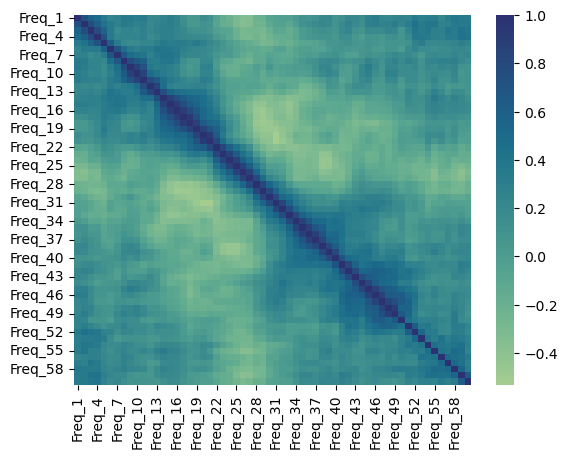

In [14]:
# Напишите Ваш код здесь
sns.heatmap((df.drop('Label', axis=1)).corr(), cmap='crest')

<AxesSubplot:>

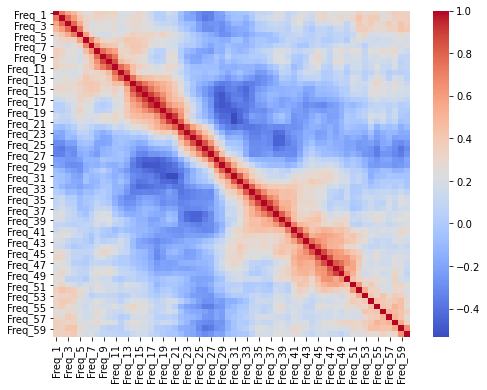

**ЗАДАНИЕ: Какие 5 частот лучше всего коррелируют с целевой переменной?**

*Замечание: Вы можете пометить целевую переменную с помощью значений 0 и 1.*

*Замечание 2: мы ищем **абсолютные** значения корреляции.*

In [26]:
# Напишите Ваш код здесь
df["Target"] = df["Label"].replace(["M", "R"], [0,1])

In [39]:
corr_mat = df.drop(["Label"], axis=1).corr().abs()
corr_mat.unstack()["Target"].sort_values()[-6:]

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
dtype: float64

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

## Разбиение на обучающий и тестовый наборы данных

Здесь мы будем использовать кросс-валидацию на 90% данных, и затем оценим результаты работы нашей модели на тестовом наборе данных в 10%.

**ЗАДАНИЕ: Разделите данные на признаки и целевую переменную, а затем разбейте все данные на обучающий и тестовый наборы данных, в отношении 90% и 10%.**

In [40]:
# Напишите Ваш код здесь
X, y = df.drop(["Target", "Label"], axis=1), df["Label"]

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

**ЗАДАНИЕ: Создайте объект PipeLine, в котором будет StandardScaler и модель KNN**

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [44]:
scaler = StandardScaler()

In [45]:
model = KNeighborsClassifier()

In [46]:
my_pipline = Pipeline([("scaler", scaler), ("model", model)])

In [48]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

**ЗАДАНИЕ: С помощью пайплайна выполните поиск по сетке для различных значений k, и выведите наилучшие параметры.**

In [50]:
param_grid = {"model__n_neighbors": np.arange(1, 30)}

In [51]:
from sklearn.model_selection import GridSearchCV

In [62]:
grid = GridSearchCV(my_pipline, param_grid, n_jobs=-1, scoring="accuracy", cv=5)

In [64]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'model__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='accuracy')

In [66]:
grid.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('model', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

**(СЛОЖНОЕ) ЗАДАНИЕ: Используя словарь .cv_results_, попробуйте нарисовать график средних тестовых оценок (mean_test_score) для каждого значения K.**

In [69]:
# Напишите Ваш код здесь
accur = grid.cv_results_["mean_test_score"]

array([0.84537696, 0.78065434, 0.77524893, 0.75917496, 0.75931721,
       0.74822191, 0.75945946, 0.71664296, 0.7113798 , 0.68421053,
       0.70042674, 0.68435277, 0.68449502, 0.67908962, 0.69530583,
       0.68990043, 0.7113798 , 0.70042674, 0.72204836, 0.67908962,
       0.70071124, 0.69530583, 0.69530583, 0.68463727, 0.68477952,
       0.67923186, 0.67411095, 0.65775249, 0.6685633 ])

Text(0, 0.5, 'Accuracy')

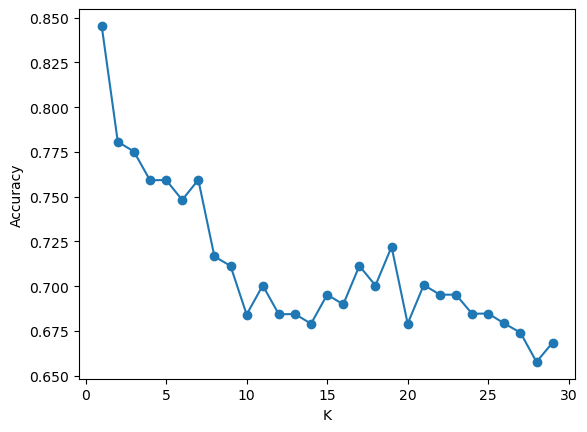

In [72]:
plt.plot(np.arange(1, 30), accur,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

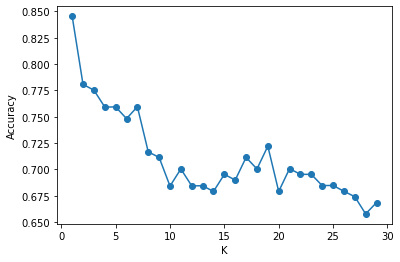

### Финальная оценка модели

**ЗАДАНИЕ: используя объект grid classifier с предыдущего шага, создайте финальный отчёт "classification report" и матрицу "confusion matrix".**

In [75]:
# Напишите Ваш код здесь
y_pred = grid.predict(X_test)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
confusion_matrix(y_test, y_pred)

array([[12,  1],
       [ 1,  7]], dtype=int64)

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



array([[12,  1],
       [ 1,  7]], dtype=int64)

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



### Отличная работа!